# CLASS 10 / Classification / Abalone dataset

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, grid_search, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
#Dataset
df = pd.read_csv(os.path.join('..', 'datasets', 'abalone.csv'))
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.isnull().sum()

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [5]:
df.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


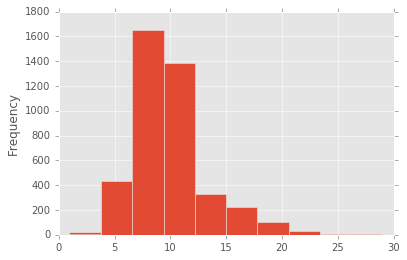

In [9]:
df.Rings.plot(kind='hist')

In [10]:
df.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
WholeWeight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
ShuckedWeight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
VisceraWeight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
ShellWeight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [11]:
color = df.Sex.map({'F': 'red', 'I': 'green', 'M': 'blue'})

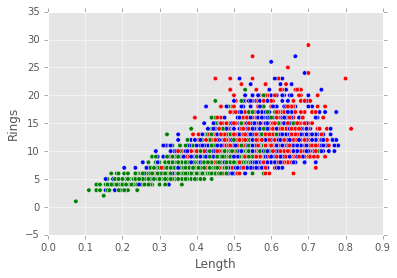

In [13]:
df.plot(x = 'Length', y = 'Rings', kind = 'scatter', c = color)

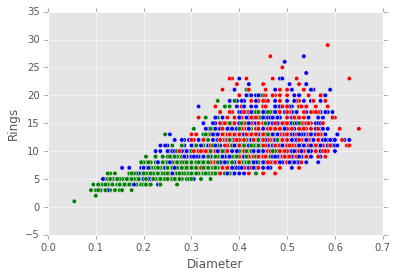

In [17]:
df.plot(x = 'Diameter', y = 'Rings', kind = 'scatter', c = color)

In [31]:
c = df.Rings

In [23]:
c.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [30]:
X = df[ ['Length', 'Height', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight'] ]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [32]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(X, c)

In [33]:
k = range(1, df.shape[0])

score_df = pd.DataFrame({'k': k})

score_df['model'] = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(X, c), axis = 1)

score_df['score'] = score_df.model.apply(lambda model: model.score(X, c))

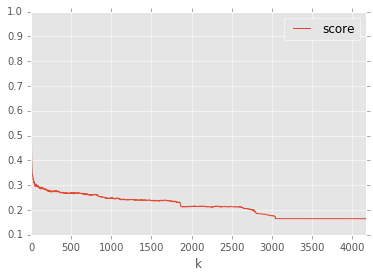

In [34]:
score_df.plot(x = 'k', y = 'score')

In [37]:
score_df[score_df.score>0.5]

,k,model,score
0,1,"KNeighborsClassifier(algorithm='auto', leaf_si...",1.000000
1,2,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.592770
2,3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.509217
